In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [66]:
mens_df = pd.read_csv('../data/mens.csv',header=0,parse_dates=["Date"])
mens_df.head()
# Remove walkovers
mens_df = mens_df[mens_df['Comment']!='Walkover']

/Users/thomasblake/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (11,12,15,16,17,18,38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [31]:
## If Player A wins winner index =0, if player B wins winner index = 1
playerA = []
playerB = []
winnerIndex = []
for index, row in mens_df.iterrows():
    winner, loser = row[["Winner","Loser"]]
    if random.randint(1,2) == 1:
        playerA.append(winner)
        playerB.append(loser)
        winnerIndex.append(0)
    else:
        playerA.append(loser)
        playerB.append(winner)
        winnerIndex.append(1)

mens_df["playerA"] = playerA
mens_df["playerB"] = playerB
mens_df.head()

,Winner,Loser,playerA,playerB
0,Dosedel S.,Ljubicic I.,Dosedel S.,Ljubicic I.
1,Enqvist T.,Clement A.,Clement A.,Enqvist T.
2,Escude N.,Baccanello P.,Baccanello P.,Escude N.
3,Federer R.,Knippschild J.,Federer R.,Knippschild J.
4,Fromberg R.,Woodbridge T.,Woodbridge T.,Fromberg R.


In [34]:
mens_df.columns
mens_df = mens_df[[]]

Index(['ATP', 'Location', 'Tournament', 'Date', 'Series', 'Court', 'Surface',
       'Round', 'Best of', 'Winner', 'Loser', 'WRank', 'LRank', 'W1', 'L1',
       'W2', 'L2', 'W3', 'L3', 'W4', 'L4', 'W5', 'L5', 'Wsets', 'Lsets',
       'Comment', 'CBW', 'CBL', 'GBW', 'GBL', 'IWW', 'IWL', 'SBW', 'SBL',
       'B365W', 'B365L', 'B&WW', 'B&WL', 'EXW', 'EXL', 'PSW', 'PSL', 'WPts',
       'LPts', 'UBW', 'UBL', 'LBW', 'LBL', 'SJW', 'SJL', 'MaxW', 'MaxL',
       'AvgW', 'AvgL'],
      dtype='object')

              unique_values    counts
0           Australian Open  0.047648
1               French Open  0.047591
2                   US Open  0.047573
3                 Wimbledon  0.045223
4        Sony Ericsson Open  0.021202
..                      ...       ...
220         Dusseldorf Open  0.000507
221  Adelaide International  0.000507
222               Tata Open  0.000507
223         Power Horse Cup  0.000489
224          LA Tennis Open  0.000489

[225 rows x 2 columns]


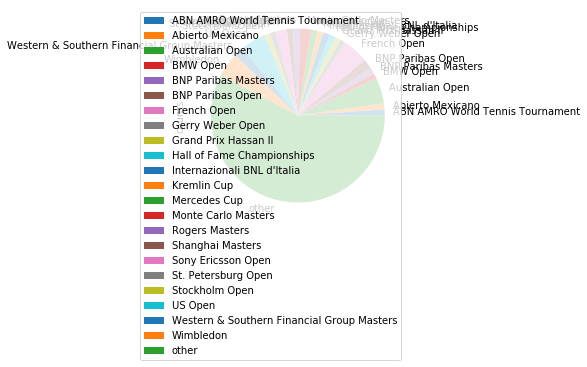

In [65]:
len(mens_df['Tournament'].unique())
tournaments = mens_df['Tournament'].value_counts(normalize=True).rename_axis('unique_values').reset_index(name='counts')
print(tournaments)
tournaments['unique_values'] = tournaments.apply(lambda x : 'other' if x['counts'] <= 0.01 else x['unique_values'], axis=1)
tournaments = tournaments.groupby('unique_values').sum()
tournaments.plot.pie(y='counts')